## Latent Semantic Analysis (LSA)

In [1]:
# https://towardsdatascience.com/2-latent-methods-for-dimension-reduction-and-topic-modeling-20ff6d7d547
# https://towardsdatascience.com/3-basic-approaches-in-bag-of-words-which-are-better-than-word-embeddings-c2cbc7398016

Latent semantic analysis is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms.

LSA for natural language processing task was introduced by Jerome Bellegarda in 2005. The objective of LSA is reducing dimension for classification. The idea is that words will occurs in similar pieces of text if they have similar meaning. We usually use Latent Semantic Indexing (LSI) as an alternative name in NLP field.

First of all, we have m documents and n words as input. An m * n matrix can be constructed while column and row are document and word respectively. You can use count occurrence or TF-IDF score. However, TF-IDF is better than count occurrence in most of the time as high frequency do not account for better classification.

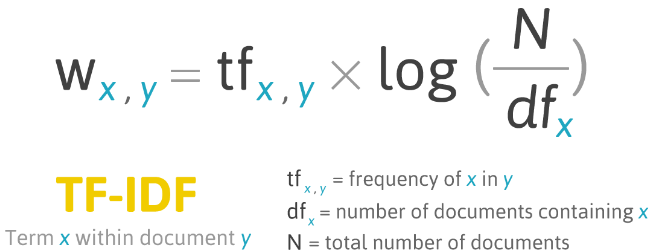

In [2]:

import os
import gensim
from gensim.models import LsiModel
from gensim import models
from gensim import corpora
from gensim.utils import lemmatize
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords, stem_text
from gensim.parsing.preprocessing import strip_numeric
import pandas as pd
from gensim import similarities

In [3]:
model_dir = '/home/ramaseshan/temp/'
physics_corpus_dir = 'https://raw.githubusercontent.com/Ramaseshanr/anlp/master/corpus/phy_corpus.txt'


cor = pd.read_csv(physics_corpus_dir, sep='\n', header=None)[0]

In [4]:
print(cor)

0      An airplane accelerates down a runway at 3.20 ...
1      A car starts from rest and accelerates uniform...
2      Upton Chuck is riding the Giant Drop at Great ...
3      A race car accelerates uniformly from 18.5 m/s...
4      A feather is dropped on the moon from a height...
                             ...                        
266    A rocket  is fired  vertically  and  ascends  ...
267    The Earth orbits the Sun at a distance of 1500...
268    The cyclist in Figure 2.15 is travelling at 15...
269    88. Bicycle A bicycle accelerates from 0.0 m/s...
270     A weather balloon is floating at a constant h...
Name: 0, Length: 271, dtype: object


In [5]:
def preprocessing():
    for document in cor:
        doc = strip_numeric(stem_text(document))        
        yield gensim.utils.tokenize(doc, lower=True)

texts = preprocessing()

In [6]:
#creating bag of words
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=1, keep_n=700)

In [7]:
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in preprocessing()]
tfidf = models.TfidfModel(doc_term_matrix)
corpus_tfidf = tfidf[doc_term_matrix]


In [8]:
# num_topics is sigma
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=20)  # initialize an LSI transformation
doc = 'car acceleration speed far'
vec_bow = dictionary.doc2bow(doc.lower().split())

In [9]:
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
index = similarities.MatrixSimilarity(lsi[doc_term_matrix])
unsorted_similarity = index[vec_lsi]
sorted_similarity = sorted(enumerate(unsorted_similarity), key=lambda item: -item[1])
for index, similarity in sorted_similarity:
    print(similarity, cor[index])

0.9028569 A car starts from rest and travels for 5 seconds with a uniform acceleration of– 1.5 m/s2 . What is the final velocity of the car.? How far does the car travel in this timeinterval?
0.8970313 A car starts from rest and travels for 5.0 s with a uniform acceleration of -1.5 m/s2.  What is the final velocity of the car?  How far does the car travel in this time interval? 
0.8898555 A driver of a car traveling at 15.0 m/s applies the brakes, causing a uniform acceleration of -2.0 m/s2.  How long does it take the car to accelerate to a final speed of 10.0 m/s?  How far has the car moved during the braking period? 
0.8871972 A car has an acceleration of 3 m/s². If the initial velocity of the car is 5 m/s, determine: (a) How far the car travels in 6 s; (b) How far the car has travelled when it reaches a velocity of 30 m/s. 
0.8782142 A driver of a car traveling at -15 m/s applies the brakes, causing a uniform accelerationof +2 m/s2 . If the brakes are applied for 2.5 seconds what is